# Optimization

### Resources
- https://github.com/automl/auto-sklearn/issues/1684
- https://geemap.org/notebooks/46_local_rf_training/

## Install auto-sklearn

In [1]:
# 1. uninstall all affected packages
!pip uninstall -y Cython scipy pyparsing scikit_learn imbalanced-learn mlxtend yellowbrick

Found existing installation: Cython 0.29.36
Uninstalling Cython-0.29.36:
  Successfully uninstalled Cython-0.29.36
Found existing installation: scipy 1.9.0
Uninstalling scipy-1.9.0:
  Successfully uninstalled scipy-1.9.0
Found existing installation: pyparsing 2.4.0
Uninstalling pyparsing-2.4.0:
  Successfully uninstalled pyparsing-2.4.0
Found existing installation: scikit-learn 0.24.2
Uninstalling scikit-learn-0.24.2:
  Successfully uninstalled scikit-learn-0.24.2


In [2]:
# 2. install packages to be downgraded
!pip install Cython==0.29.36 scipy==1.9 pyparsing==2.4

  Using cached Cython-0.29.36-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Using cached scipy-1.9.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (43.9 MB)
  Using cached pyparsing-2.4.0-py2.py3-none-any.whl (62 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
auto-sklearn 0.15.0 requires scikit-learn<0.25.0,>=0.24.0, which is not installed.
fastai 2.7.14 requires scikit-learn, which is not installed.
librosa 0.10.1 requires scikit-learn>=0.20.0, which is not installed.
sklearn-pandas 2.2.0 requires scikit-learn>=0.23.0, which is not installed.
smac 1.2 requires scikit-learn>=0.22.0, which is not installed.
httplib2 0.22.0 requires pyparsing!=3.0.0,!=3.0.1,!=3.0.2,!=3.0.3,<4,>=2.4.2; python_version > "3.0", but you have pyparsing 2.4.0 which is incompatible.


In [3]:
# 3. install older scikit-learn disregarding its dependencies
!pip install scikit-learn==0.24.2 --no-build-isolation

  Using cached scikit_learn-0.24.2-cp310-cp310-linux_x86_64.whl
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.24.0 requires scikit-learn>=1.2.2, but you have scikit-learn 0.24.2 which is incompatible.


In [4]:
# 4. finally install auto-sklearn
!pip install auto-sklearn

In [5]:
# 5. then, try loading the package repeatedly until trash in its dependencies are clean
#import autosklearn

## Setup

In [1]:
from google.colab import drive
import pandas as pd
import autosklearn.classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content/drive/MyDrive/land_cover_classification_kaza

/content/drive/MyDrive/land_cover_classification_kaza


## Load train and test set

In [4]:
train = pd.read_csv('data/train.csv')
train

,B11_dry,B11_rainy,B12_dry,B12_rainy,B2_dry,B2_rainy,B3_dry,B3_rainy,B4_dry,B4_rainy,...,B6_rainy,B7_dry,B7_rainy,B8A_dry,B8A_rainy,B8_dry,B8_rainy,LC_Nr,LC_Out,Landcover
0,1993.000000,2181.0,1200.0,1565.0,518.375000,612.0,692.500000,792.0,804.0,824.0,...,2164.0,1860.500000,2544.0,2196.0,2767.0,2250.666667,2670.0,7,Forest,Forest
1,1877.000000,1936.0,1243.0,947.0,405.000000,335.0,529.000000,556.0,555.0,336.0,...,2057.0,1768.000000,2450.0,2013.0,2755.0,1770.000000,2412.0,7,Forest,Forest
2,2244.500000,2038.0,1338.8,1057.0,478.000000,343.0,696.000000,612.0,739.5,460.0,...,2267.0,2123.333333,2638.0,2498.0,3081.0,2577.000000,2916.0,7,Forest,Forest
3,1872.500000,1748.0,1225.5,928.0,386.500000,294.0,522.000000,407.0,560.5,309.0,...,1709.0,1691.000000,1993.0,1934.5,2243.0,1749.000000,1964.0,7,Forest,Forest
4,2081.000000,1990.0,1229.0,996.0,433.000000,343.0,608.666667,602.0,628.0,398.0,...,2312.0,1978.000000,2623.0,2299.0,2914.0,2122.000000,2692.0,7,Forest,Forest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3300,3092.666667,3232.0,2524.5,2754.0,866.500000,1162.0,1096.000000,1492.0,1484.0,1278.0,...,2584.0,2031.000000,2969.0,2339.5,3306.0,2266.666667,3212.0,3,Built-up,Built up
3301,3586.000000,3501.0,3187.5,2601.0,1168.000000,1090.0,1326.000000,1250.0,2012.0,2154.0,...,2727.0,2563.500000,2979.0,2780.0,3186.0,2618.000000,2994.0,3,Built-up,Built up
3302,3474.400000,2904.0,2970.5,2308.0,1122.000000,1102.0,1458.000000,1466.0,1848.0,1642.0,...,2658.0,2521.000000,2922.0,2757.6,3097.0,2689.000000,2786.0,3,Built-up,Built up
3303,3447.000000,2056.0,3303.0,1414.0,1203.333333,576.0,1410.000000,784.0,1806.0,699.5,...,1892.5,2068.000000,2108.5,2315.0,2342.5,2502.000000,2186.0,3,Built-up,Built up


In [5]:
X_train = train.drop(['LC_Nr', 'LC_Out', 'Landcover'], axis=1)
X_train

,B11_dry,B11_rainy,B12_dry,B12_rainy,B2_dry,B2_rainy,B3_dry,B3_rainy,B4_dry,B4_rainy,B5_dry,B5_rainy,B6_dry,B6_rainy,B7_dry,B7_rainy,B8A_dry,B8A_rainy,B8_dry,B8_rainy
0,1993.000000,2181.0,1200.0,1565.0,518.375000,612.0,692.500000,792.0,804.0,824.0,1098.00,1220.0,1671.000000,2164.0,1860.500000,2544.0,2196.0,2767.0,2250.666667,2670.0
1,1877.000000,1936.0,1243.0,947.0,405.000000,335.0,529.000000,556.0,555.0,336.0,949.00,952.0,1524.000000,2057.0,1768.000000,2450.0,2013.0,2755.0,1770.000000,2412.0
2,2244.500000,2038.0,1338.8,1057.0,478.000000,343.0,696.000000,612.0,739.5,460.0,1156.25,1011.0,1834.750000,2267.0,2123.333333,2638.0,2498.0,3081.0,2577.000000,2916.0
3,1872.500000,1748.0,1225.5,928.0,386.500000,294.0,522.000000,407.0,560.5,309.0,934.00,715.0,1465.000000,1709.0,1691.000000,1993.0,1934.5,2243.0,1749.000000,1964.0
4,2081.000000,1990.0,1229.0,996.0,433.000000,343.0,608.666667,602.0,628.0,398.0,1125.50,1051.0,1747.333333,2312.0,1978.000000,2623.0,2299.0,2914.0,2122.000000,2692.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3300,3092.666667,3232.0,2524.5,2754.0,866.500000,1162.0,1096.000000,1492.0,1484.0,1278.0,1675.50,1805.0,1844.333333,2584.0,2031.000000,2969.0,2339.5,3306.0,2266.666667,3212.0
3301,3586.000000,3501.0,3187.5,2601.0,1168.000000,1090.0,1326.000000,1250.0,2012.0,2154.0,2060.00,1969.0,2428.000000,2727.0,2563.500000,2979.0,2780.0,3186.0,2618.000000,2994.0
3302,3474.400000,2904.0,2970.5,2308.0,1122.000000,1102.0,1458.000000,1466.0,1848.0,1642.0,2015.00,1944.0,2330.000000,2658.0,2521.000000,2922.0,2757.6,3097.0,2689.000000,2786.0
3303,3447.000000,2056.0,3303.0,1414.0,1203.333333,576.0,1410.000000,784.0,1806.0,699.5,1761.00,1106.5,1926.000000,1892.5,2068.000000,2108.5,2315.0,2342.5,2502.000000,2186.0


In [6]:
y_train = train['LC_Nr']
y_train

0       7
1       7
2       7
3       7
4       7
       ..
3300    3
3301    3
3302    3
3303    3
3304    3
Name: LC_Nr, Length: 3305, dtype: int64

In [7]:
test = pd.read_csv('data/test.csv')
test

,B11_dry,B11_rainy,B12_dry,B12_rainy,B2_dry,B2_rainy,B3_dry,B3_rainy,B4_dry,B4_rainy,...,B6_rainy,B7_dry,B7_rainy,B8A_dry,B8A_rainy,B8_dry,B8_rainy,LC_Nr,LC_Out,Landcover
0,1466.250000,1610.0,747.800000,792.0,308.909091,325.0,455.000000,497.5,372.400000,310.0,...,2042.5,1723.5,2396.0,1914.333333,2568.5,1834.750000,2335.0,7,Forest,Forest
1,1355.000000,1421.0,657.000000,600.0,316.500000,228.0,447.000000,362.0,367.000000,224.0,...,1788.0,1798.5,2165.0,1992.500000,2436.0,1967.500000,2193.0,7,Forest,Forest
2,1879.500000,1911.0,1113.500000,935.0,390.000000,311.0,536.000000,539.0,563.666667,395.0,...,2221.0,1733.0,2521.0,2017.500000,2839.0,1758.000000,2472.0,7,Forest,Forest
3,1833.333333,1832.0,1062.000000,869.0,382.000000,304.0,531.333333,589.0,546.000000,309.0,...,2233.0,1788.4,2544.0,2055.250000,2756.0,1955.333333,2710.0,7,Forest,Forest
4,1906.142857,1685.0,1134.166667,934.0,399.400000,327.0,560.666667,532.0,654.142857,402.0,...,1958.0,1812.8,2284.0,2094.857143,2467.0,1778.000000,2142.0,7,Forest,Forest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78316,2897.000000,3235.0,2883.000000,3290.0,961.333333,1346.0,1237.000000,1580.0,1584.000000,1932.0,...,2261.0,2066.0,2315.0,2116.000000,2417.0,1868.000000,2188.0,3,Built-up,Built up
78317,3748.500000,2491.0,3817.500000,1922.5,1204.000000,830.0,1412.000000,1061.5,1762.000000,1065.0,...,2101.5,2339.5,2340.0,2625.000000,2498.0,2432.000000,2291.0,3,Built-up,Built up
78318,3840.000000,2655.5,3858.500000,2058.5,1327.000000,807.0,1559.000000,1053.0,1938.000000,1028.0,...,2190.5,2377.5,2410.5,2632.500000,2638.0,2644.000000,2422.0,3,Built-up,Built up
78319,3790.000000,3933.0,3551.000000,3485.0,1240.000000,1660.0,1376.000000,1972.0,1724.000000,2398.0,...,2708.0,2341.0,2977.0,2725.000000,3270.0,2559.000000,3160.0,3,Built-up,Built up


In [8]:
X_test = test.drop(['LC_Nr', 'LC_Out', 'Landcover'], axis=1)
X_test

,B11_dry,B11_rainy,B12_dry,B12_rainy,B2_dry,B2_rainy,B3_dry,B3_rainy,B4_dry,B4_rainy,B5_dry,B5_rainy,B6_dry,B6_rainy,B7_dry,B7_rainy,B8A_dry,B8A_rainy,B8_dry,B8_rainy
0,1466.250000,1610.0,747.800000,792.0,308.909091,325.0,455.000000,497.5,372.400000,310.0,761.500000,793.5,1483.000000,2042.5,1723.5,2396.0,1914.333333,2568.5,1834.750000,2335.0
1,1355.000000,1421.0,657.000000,600.0,316.500000,228.0,447.000000,362.0,367.000000,224.0,695.000000,594.0,1475.500000,1788.0,1798.5,2165.0,1992.500000,2436.0,1967.500000,2193.0
2,1879.500000,1911.0,1113.500000,935.0,390.000000,311.0,536.000000,539.0,563.666667,395.0,963.666667,1025.0,1517.000000,2221.0,1733.0,2521.0,2017.500000,2839.0,1758.000000,2472.0
3,1833.333333,1832.0,1062.000000,869.0,382.000000,304.0,531.333333,589.0,546.000000,309.0,947.000000,962.0,1575.000000,2233.0,1788.4,2544.0,2055.250000,2756.0,1955.333333,2710.0
4,1906.142857,1685.0,1134.166667,934.0,399.400000,327.0,560.666667,532.0,654.142857,402.0,1046.250000,885.0,1615.833333,1958.0,1812.8,2284.0,2094.857143,2467.0,1778.000000,2142.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78316,2897.000000,3235.0,2883.000000,3290.0,961.333333,1346.0,1237.000000,1580.0,1584.000000,1932.0,1937.000000,2196.0,1981.000000,2261.0,2066.0,2315.0,2116.000000,2417.0,1868.000000,2188.0
78317,3748.500000,2491.0,3817.500000,1922.5,1204.000000,830.0,1412.000000,1061.5,1762.000000,1065.0,2074.333333,1407.0,2197.000000,2101.5,2339.5,2340.0,2625.000000,2498.0,2432.000000,2291.0
78318,3840.000000,2655.5,3858.500000,2058.5,1327.000000,807.0,1559.000000,1053.0,1938.000000,1028.0,2089.000000,1463.5,2198.000000,2190.5,2377.5,2410.5,2632.500000,2638.0,2644.000000,2422.0
78319,3790.000000,3933.0,3551.000000,3485.0,1240.000000,1660.0,1376.000000,1972.0,1724.000000,2398.0,1904.000000,2158.0,2108.000000,2708.0,2341.0,2977.0,2725.000000,3270.0,2559.000000,3160.0


In [9]:
y_test = test['LC_Nr']
y_test

0        7
1        7
2        7
3        7
4        7
        ..
78316    3
78317    3
78318    3
78319    3
78320    3
Name: LC_Nr, Length: 78321, dtype: int64

## Use auto-sklearn to find the best model

In [10]:
automl = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task=60*60,
    resampling_strategy='cv',
    resampling_strategy_arguments={'folds': 10},
    metric=autosklearn.metrics.f1_macro,
    n_jobs=-1,
    ensemble_kwargs = {'ensemble_size': 1},
    include = {
        'classifier': ['random_forest'],
        'feature_preprocessor': ['no_preprocessing']
    }
)

In [11]:
automl.fit(X_train, y_train)

AutoSklearnClassifier(ensemble_class=<class 'autosklearn.ensembles.ensemble_selection.EnsembleSelection'>,
                      ensemble_kwargs={'ensemble_size': 1},
                      include={'classifier': ['random_forest'],
                               'feature_preprocessor': ['no_preprocessing']},
                      metric=f1_macro, n_jobs=-1, per_run_time_limit=720,
                      resampling_strategy='cv',
                      resampling_strategy_arguments={'folds': 10})

In [12]:
y_train_pred = automl.predict(X_train)
y_test_pred = automl.predict(X_test)

## Evaluation

### Train set classification metrics

In [13]:
print('Accuracy: {:0.4f}'.format(accuracy_score(y_train, y_train_pred)))

Accuracy: 1.0000


In [14]:
print('Precision: {:0.4f}'.format(precision_score(y_train, y_train_pred, average='macro')))

Precision: 1.0000


In [15]:
print('Recall: {:0.4f}'.format(recall_score(y_train, y_train_pred, average='macro')))

Recall: 1.0000


In [16]:
print('F1-Score: {:0.4f}'.format(f1_score(y_train, y_train_pred, average='macro')))

F1-Score: 1.0000


In [17]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       263
           2       1.00      1.00      1.00       332
           3       1.00      1.00      1.00       210
           4       1.00      1.00      1.00       500
           5       1.00      1.00      1.00       500
           6       1.00      1.00      1.00       500
           7       1.00      1.00      1.00       500
           8       1.00      1.00      1.00       500

    accuracy                           1.00      3305
   macro avg       1.00      1.00      1.00      3305
weighted avg       1.00      1.00      1.00      3305



In [18]:
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[263,   0,   0,   0,   0,   0,   0,   0],
       [  0, 332,   0,   0,   0,   0,   0,   0],
       [  0,   0, 210,   0,   0,   0,   0,   0],
       [  0,   0,   0, 500,   0,   0,   0,   0],
       [  0,   0,   0,   0, 500,   0,   0,   0],
       [  0,   0,   0,   0,   0, 500,   0,   0],
       [  0,   0,   0,   0,   0,   0, 500,   0],
       [  0,   0,   0,   0,   0,   0,   0, 500]])

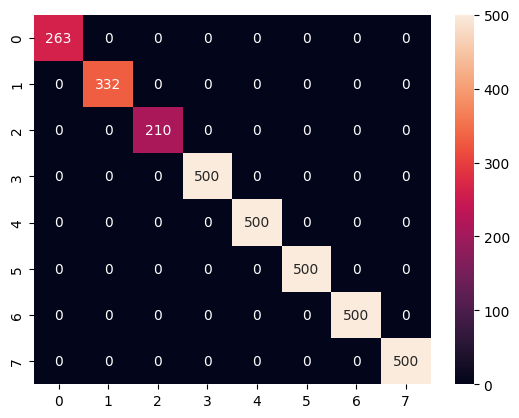

In [19]:
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

### Test set classifiction metrics

In [20]:
print('Accuracy: {:0.4f}'.format(accuracy_score(y_test, y_test_pred)))

Accuracy: 0.8934


In [21]:
print('Precision: {:0.4f}'.format(precision_score(y_test, y_test_pred, average='macro')))

Precision: 0.7167


In [22]:
print('Recall: {:0.4f}'.format(recall_score(y_test, y_test_pred, average='macro')))

Recall: 0.9038


In [23]:
print('F1-Score: {:0.4f}'.format(f1_score(y_test, y_test_pred, average='macro')))

F1-Score: 0.7661


In [24]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           1       0.83      1.00      0.91       113
           2       0.16      0.93      0.28       143
           3       0.55      0.89      0.68        90
           4       0.99      0.92      0.95     17628
           5       0.66      0.87      0.75      3248
           6       0.61      0.83      0.70      8266
           7       0.96      0.89      0.93     35183
           8       0.97      0.90      0.93     13650

    accuracy                           0.89     78321
   macro avg       0.72      0.90      0.77     78321
weighted avg       0.92      0.89      0.90     78321



In [25]:
cm = confusion_matrix(y_test, y_test_pred)
cm

array([[  113,     0,     0,     0,     0,     0,     0,     0],
       [    0,   133,     1,     6,     3,     0,     0,     0],
       [    0,     3,    80,     6,     1,     0,     0,     0],
       [    0,   624,    59, 16194,   217,   398,   125,    11],
       [    0,    29,     1,    15,  2811,   174,     7,   211],
       [    0,    33,     5,    97,   335,  6878,   891,    27],
       [    0,     0,     0,     0,    19,  3535, 31471,   158],
       [   23,     0,     0,    50,   866,   281,   139, 12291]])

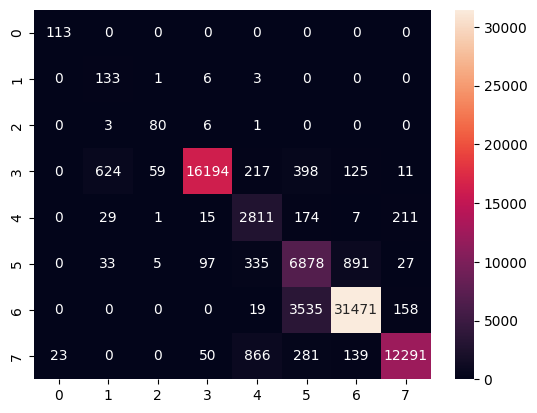

In [26]:
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

### Model ranking and hyperparameters

In [27]:
automl.leaderboard(detailed=True, ensemble_only=False)

,rank,ensemble_weight,type,cost,duration,config_id,train_loss,seed,start_time,end_time,budget,status,data_preprocessors,feature_preprocessors,balancing_strategy,config_origin
model_id,,,,,,,,,,,,,,,,
31,1,1.0,random_forest,0.087220,160.091493,30,0.000000,0,1.710540e+09,1.710540e+09,0.0,StatusType.SUCCESS,[],[no_preprocessing],none,Local Search
29,2,0.0,random_forest,0.087536,202.027562,28,0.000000,0,1.710540e+09,1.710540e+09,0.0,StatusType.SUCCESS,[],[no_preprocessing],none,Random Search (sorted)
26,3,0.0,random_forest,0.087923,246.130522,25,0.000000,0,1.710540e+09,1.710540e+09,0.0,StatusType.SUCCESS,[],[no_preprocessing],none,Local Search
3,4,0.0,random_forest,0.088937,208.012693,2,0.000000,0,1.710538e+09,1.710538e+09,0.0,StatusType.SUCCESS,[],[no_preprocessing],weighting,Initial design
30,5,0.0,random_forest,0.089699,148.444702,29,0.000000,0,1.710540e+09,1.710540e+09,0.0,StatusType.SUCCESS,[],[no_preprocessing],none,Random Search (sorted)
35,6,0.0,random_forest,0.089921,251.463518,34,0.000000,0,1.710541e+09,1.710541e+09,0.0,StatusType.SUCCESS,[],[no_preprocessing],none,Local Search
17,7,0.0,random_forest,0.091130,231.324971,16,0.000000,0,1.710539e+09,1.710539e+09,0.0,StatusType.SUCCESS,[],[no_preprocessing],weighting,Random Search (sorted)
2,8,0.0,random_forest,0.095290,121.177828,1,0.000000,0,1.710538e+09,1.710538e+09,0.0,StatusType.SUCCESS,[],[no_preprocessing],none,Initial design
23,9,0.0,random_forest,0.095645,209.235183,22,0.000000,0,1.710540e+09,1.710540e+09,0.0,StatusType.SUCCESS,[],[no_preprocessing],weighting,Random Search (sorted)


In [28]:
automl.get_models_with_weights()

[(1.0,
  SimpleClassificationPipeline({'balancing:strategy': 'none', 'classifier:__choice__': 'random_forest', 'data_preprocessor:__choice__': 'feature_type', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:random_forest:bootstrap': 'False', 'classifier:random_forest:criterion': 'gini', 'classifier:random_forest:max_depth': 'None', 'classifier:random_forest:max_features': 0.5283399735690391, 'classifier:random_forest:max_leaf_nodes': 'None', 'classifier:random_forest:min_impurity_decrease': 0.0, 'classifier:random_forest:min_samples_leaf': 1, 'classifier:random_forest:min_samples_split': 3, 'classifier:random_forest:min_weight_fraction_leaf': 0.0, 'data_preprocessor:feature_type:numerical_transformer:imputation:strategy': 'mean', 'data_preprocessor:feature_type:numerical_transformer:rescaling:__choice__': 'minmax'},
  dataset_properties={
    'task': 2,
    'sparse': False,
    'multilabel': False,
    'multiclass': True,
    'target_type': 'classification',
    'sig

In [29]:
automl.show_models()

{31: {'model_id': 31,
  'rank': 1,
  'cost': 0.08721971986968444,
  'ensemble_weight': 1.0,
  'voting_model': VotingClassifier(estimators=None, voting='soft'),
  'estimators': [{'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice at 0x794b1fb7abf0>,
    'balancing': Balancing(random_state=1),
    'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice at 0x794b1fa44730>,
    'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice at 0x794b1c7609d0>,
    'sklearn_classifier': RandomForestClassifier(bootstrap=False, max_features=4, min_samples_split=3,
                           n_estimators=512, n_jobs=1, random_state=1,
                           warm_start=True)},
   {'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice at 0x794b0afa1d80>,
    'balancing': Balancing(random_state=1),
    'feature_preprocessor': <autosklearn.pipel